In [2]:
import numpy as np
import pandas as pd
from pydataset import data
import env as env
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
import acquire as acq
import prepare as prep
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import os
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


from io import StringIO

In [2]:
#import

In [3]:
titanic = acq.get_titanic_data()

titanic = acq.prep_titanic(titanic)

#prep
titanic.head()

csv file found and loaded


,survived,pclass,sibsp,parch,fare,alone
0,0,3,1,0,7.2500,0
1,1,1,1,0,71.2833,0
2,1,3,0,0,7.9250,1
3,1,1,1,0,53.1000,0
4,0,3,0,0,8.0500,1


In [4]:
X = titanic.drop(columns= 'survived')
Y = titanic.survived

In [5]:
#Split into train, validate, test

X_train, X_validate, X_test, y_train, y_validate, y_test = acq.train_validate_test_split(X, Y)


In [56]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)
X_train = pd.DataFrame(X_train)
X_validate = pd.DataFrame(X_validate)
X_test = pd.DataFrame(X_test)

In [ ]:
#Explore  

In [40]:
baseline_accuracy = (y_train.survived == 0).mean()
baseline_accuracy

0.6161048689138576

In [7]:
y_train.shape

(534, 1)

In [27]:
y_train.survived.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [28]:
y_train.survived

455    1
380    1
492    0
55     1
243    0
      ..
695    0
128    1
636    0
222    0
496    1
Name: survived, Length: 534, dtype: int64

In [10]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [15]:
clf_f = clf.fit(X_train, y_train)
clf_f

DecisionTreeClassifier()

In [43]:
clf.predict(X_train)[:20]

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [44]:
clf.score(X_train, y_train)

0.8651685393258427

In [45]:
y_pred = clf.predict(X_train)

In [47]:
conf = confusion_matrix(y_train, y_pred)
conf

array([[326,   3],
       [ 69, 136]])

In [49]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       329
           1       0.98      0.66      0.79       205

    accuracy                           0.87       534
   macro avg       0.90      0.83      0.85       534
weighted avg       0.88      0.87      0.86       534



In [58]:
labels = sorted(y_train.survived.unique())
labels

[0, 1]

In [51]:
conf

array([[326,   3],
       [ 69, 136]])

In [54]:
pd.DataFrame(conf)

,0,1
0,326,3
1,69,136


In [59]:
pd.DataFrame(conf,
            index=[str(label) + '_actual' for label in labels],
            columns=[str(label) + '_predict' for label in labels])

,0_predict,1_predict
0_actual,326,3
1_actual,69,136


In [60]:
conf.ravel()

array([326,   3,  69, 136])

In [62]:
TN, FP, FN, TP = conf.ravel()
TN, FP, FN, TP

(326, 3, 69, 136)

In [70]:
all_ = (TP + TN + FP + FN)
accuracy = (TP + TN) / all_
TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)
TNR = TN / (FP + TN)
FNR = FN / (FN + TP)
precision = TP / (TP + FP)
f1 = 2 * ((precision * recall) / (precision + recall))
support_pos = TP + FN
support_neg = FP + TN

In [71]:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.8651685393258427

True Positive Rate/Sensitivity/Recall/Power: 0.6634146341463415
False Positive Rate/False Alarm Ratio/Fall-out: 0.00911854103343465
True Negative Rate/Specificity/Selectivity: 0.9908814589665653
False Negative Rate/Miss Rate: 0.33658536585365856

Precision/PPV: 0.9784172661870504
F1 Score: 0.7906976744186046

Support (0): 205
Support (1): 329


In [72]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
tree.score(X_train, y_train)

0.704119850187266

In [74]:
for x in range(1,10):
    
    tree = DecisionTreeClassifier(max_depth=x)
    tree.fit(X_train, y_train)
    acc = tree.score(X_train, y_train)
    print(f'for depth of {x:2}, the accuracy is {round(acc,2)}')

for depth of  1, the accuracy is 0.67
for depth of  2, the accuracy is 0.7
for depth of  3, the accuracy is 0.7
for depth of  4, the accuracy is 0.74
for depth of  5, the accuracy is 0.76
for depth of  6, the accuracy is 0.77
for depth of  7, the accuracy is 0.78
for depth of  8, the accuracy is 0.79
for depth of  9, the accuracy is 0.81


In [78]:
scores_all = []

for x in range(1,10):
    
    tree = DecisionTreeClassifier(max_depth=x)
    tree.fit(X_train, y_train)
    train_acc = tree.score(X_train, y_train)
    
    val_acc = tree.score(X_validate, y_validate)
    
    scores_all.append([x, train_acc, val_acc])
    
    

In [80]:
scores_df = pd.DataFrame(scores_all, columns=['max_depth', 'train_acc', 'val_acc'])
scores_df.head()

,max_depth,train_acc,val_acc
0,1,0.666667,0.657303
1,2,0.700375,0.702247
2,3,0.704120,0.691011
3,4,0.737828,0.702247
4,5,0.764045,0.713483


In [83]:
scores_df['diff'] = scores_df.train_acc - scores_df.val_acc
scores_df.sort_values('diff').head()

,max_depth,train_acc,val_acc,diff
1,2,0.700375,0.702247,-0.001873
0,1,0.666667,0.657303,0.009363
2,3,0.704120,0.691011,0.013109
5,6,0.771536,0.741573,0.029963
3,4,0.737828,0.702247,0.035581


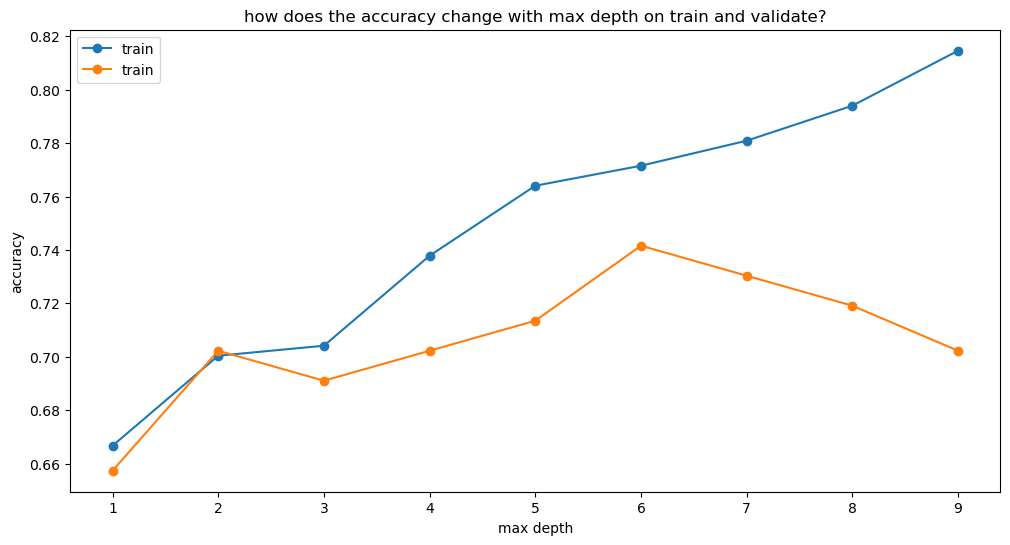

In [84]:
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='train', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()